<a href="https://colab.research.google.com/github/tomikjeztracen/CNN-Flowers/blob/main/horak_tomas_semestralka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/resized.zip'
# Directory where you want to extract the files
extract_dir = './prod'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to ./prod


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Paths
image_folder = '/content/data/images'  # Path to the folder containing images
csv_file = '/content/one_hot_encoded_flowers.csv'   # Path to the CSV with one-hot encoded labels

# Load the CSV with image labels
labels_df = pd.read_csv(csv_file)

# Prepare image paths and labels
image_paths = []
labels = []

# Loop through the CSV and load corresponding images and labels
for i, row in labels_df.iterrows():
    image_filename = row['filename']  # Assuming the column containing filenames is named 'image_filename'
    label = row.drop('filename').values  # Drop 'image_filename' and keep the one-hot encoded label
    image_path = os.path.join(image_folder, image_filename)

    # Read the image (images are already 128px)
    try:
      img = load_img(image_path, target_size=(128, 128))  # Ensure size (128, 128)
    except:
      print("skipped")
    img_array = img_to_array(img)  # Convert image to numpy array

    image_paths.append(img_array)
    labels.append(label)

# Convert lists to numpy arrays
X = np.array(image_paths)
y = np.array(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


https://www.youtube.com/watch?v=q7ZuZ8ZOErE


FileNotFoundError: [Errno 2] No such file or directory: '/content/one_hot_encoded_flowers.csv'

In [ ]:
import tensorflow as tf
import pandas as pd

directory = "/content/data/resized"

df = pd.read_csv("/content/encoded.csv")

file_paths = df["filename"].values
labels = df["numerical_label"].values

tf_dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

def read_image(image_file, label):
    image = tf.io.read_file(directory + image_file)
    image = tf.image.decode_image(image, channels=3, dtype=tf.float32)
    return image,label

tf_dataset_output = tf_dataset.map(read_image).batch(32)
print(tf_dataset_output)


<_BatchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Directory and CSV loading
directory = "/content/prod/resized"
df = pd.read_csv("/content/encoded.csv")

# File paths and labels
file_paths = df["filename"].values
labels = df["numerical_label"].values

# TensorFlow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

# Function to read and decode images
def read_image(image_file, label):
    image = tf.io.read_file(directory + "/" + image_file)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode the image as RGB
    image = tf.image.resize(image, [128, 128])  # Resize image to 128x128
    image = tf.cast(image, tf.float32)  # Cast the image to float32
    image /= 255.0  # Normalize the image to [0, 1] range
    return image, label

# Map the read_image function and batch the data
tf_dataset_output = tf_dataset.map(read_image).shuffle(1000).batch(128)

# Define a simple Keras model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Input shape
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes
])


# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(tf_dataset_output, epochs=30)


Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 30s 142ms/step - accuracy: 0.2854 - loss: 5.4953
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.0368 - loss: 3.1909
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.0905 - loss: 3.1972
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.1244 - loss: 3.1693
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.1361 - loss: 3.1802
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.1206 - loss: 3.2069
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.1216 - loss: 3.1989
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.1288 - loss: 3.1866
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.1224 - loss: 3.1955
Epoch 10/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.1230 - loss: 3.1916
Epoch 11/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.1216 - loss: 3.1892
Epoch 12/30
117/117 ━━━━━━━━━

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

# Directory and CSV loading
directory = "/content/prod/resized"
df = pd.read_csv("/content/encoded.csv")

# File paths and labels
file_paths = df["filename"].values
labels = df["numerical_label"].values

# TensorFlow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

# Function to read and decode images
def read_image(image_file, label):
    image = tf.io.read_file(directory + "/" + image_file)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode the image as RGB
    image = tf.image.resize(image, [128, 128])  # Resize image to 128x128
    image = tf.cast(image, tf.float32)  # Cast the image to float32
    image /= 255.0  # Normalize the image to [0, 1] range
    return image, label

# Map the read_image function and batch the data
tf_dataset_output = tf_dataset.map(read_image).shuffle(1000).batch(32)

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a more complex Keras model with better initialization, dropout, and batch normalization
model = Sequential([
    layers.Input(shape=(128, 128, 3)),  # Input shape

    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes
])

# Create an Adam optimizer with a learning rate
optimizer = Adam(learning_rate=1e-4)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights based on label distribution (if needed)
class_weights = dict(zip(*np.unique(labels, return_counts=True)))
total = len(labels)
class_weights = {k: total / v for k, v in class_weights.items()}

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train the model with class weights and early stopping
model.fit(tf_dataset_output, epochs=200, class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.2924 - loss: 81.9408
Epoch 2/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1371 - loss: 73.0537
Epoch 3/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.1420 - loss: 72.2377
Epoch 4/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.1112 - loss: 73.8323
Epoch 5/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1426 - loss: 71.8099
Epoch 6/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.1426 - loss: 72.1266
Epoch 7/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1301 - loss: 72.4403
Epoch 8/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.1004 - loss: 72.5625
Epoch 9/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.1138 - loss: 72.0803
Epoch 10/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.1258 - loss: 71.5750
Epoch 11/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.0880 - loss: 73.5240
Epoch 12

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Directory and CSV loading
directory = "/content/prod/resized"
df = pd.read_csv("/content/encoded.csv")

# File paths and labels
file_paths = df["filename"].values
labels = df["numerical_label"].values

# Split the dataset into train and validation sets (80/20 split)
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# TensorFlow datasets for train and validation sets
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))

# Function to read and decode images
def read_image(image_file, label):
    image = tf.io.read_file(directory + "/" + image_file)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode the image as RGB
    image = tf.image.resize(image, [128, 128])  # Resize image to 128x128
    image = tf.cast(image, tf.float32)  # Cast the image to float32
    image /= 255.0  # Normalize the image to [0, 1] range
    return image, label

# Map the read_image function and batch the data for train and validation sets
train_dataset = train_dataset.map(read_image).shuffle(1000).batch(32)
val_dataset = val_dataset.map(read_image).batch(32)

# Data Augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a more complex Keras model with better initialization, dropout, and batch normalization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),  # Input shape

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='softmax')  # 25 classes
])
# Create an Adam optimizer with a learning rate
optimizer = Adam(learning_rate=1e-4)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Calculate class weights based on label distribution (if needed)
class_weights = dict(zip(*np.unique(labels, return_counts=True)))
total = len(labels)
class_weights = {k: total / v for k, v in class_weights.items()}

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train the model with class weights and early stopping
model.fit(tf_dataset_output, epochs=200, class_weight=class_weights, callbacks=[early_stopping],validation_data=val_dataset)




Epoch 1/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2939 - loss: 74.4654 - val_accuracy: 0.0905 - val_loss: 3.1639
Epoch 2/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.1533 - loss: 70.1692 - val_accuracy: 0.0633 - val_loss: 3.2086
Epoch 3/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1255 - loss: 72.2365 - val_accuracy: 0.0670 - val_loss: 3.2070
Epoch 4/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.1399 - loss: 72.5281 - val_accuracy: 0.0697 - val_loss: 3.2051
Epoch 5/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.1468 - loss: 71.5254 - val_accuracy: 0.0700 - val_loss: 3.2019
Epoch 6/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.1556 - loss: 70.4716 - val_accuracy: 0.0734 - val_loss: 3.1938
Epoch 7/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.1745 - loss: 69.0878 - val_accuracy: 0.0855 - val_loss: 3.1705
Epoch 8/200
467/467 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.1395 - 

In [ ]:
tf_dataset_output.shuffle(buffer_size=len(file_paths))

# Split the dataset into train and test (80% train, 20% test)
train_size = int(0.8 * len(file_paths))  # 80% for training
test_size = len(file_paths) - train_size  # 20% for testing

# Use `take` and `skip` to split the dataset
train_dataset = tf_dataset.take(train_size)
test_dataset = tf_dataset.skip(train_size)

# Print the datasets
print(f"Train dataset: {train_size} examples")
print(f"Test dataset: {test_size} examples")

# Optionally, if you want to shuffle the train and test datasets further, you can do:
train_dataset = train_dataset.shuffle(buffer_size=train_size)
test_dataset = test_dataset.shuffle(buffer_size=test_size)


Train dataset: 11935 examples
Test dataset: 2984 examples


In [ ]:
import matplotlib.pyplot as plt
# visualize the image to see what we are working with

for image, label in train_dataset.take(1):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Attempting to slice scalar input. [Op:StridedSlice] name: strided_slice/

### Preprocessing



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf


AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = 128
batch_size = 128

#augmentation is used directly in model, I tried various augmentations (Contrast / Rotation) but these made most sense to me
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1)
])

#make sure all images are of same size (they should be from dataset, but to make sure)
def resize_and_standardize(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.image.per_image_standardization(image) # normalization to reduce impact of contrast and brightness
    return image, label

train_dataset = (
    train_dataset
    .shuffle(5000) # tried higher / lower values and this seemed best
    .map(resize_and_standardize, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

validation_dataset = (
    validation_dataset
    .map(resize_and_standardize, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_dataset = (
    test_dataset
    .map(resize_and_standardize, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras import layers, models
# tried simpler architectures with less Convulational layers but they could not achieve more than 70 % accuracy on 10 epochs, so I added more
def create_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(), # added normalization to reduce overfitting
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5), # added dropout to reduce overfitting
        layers.Dense(10, activation='softmax')
    ])
    return model

model = create_model()


In [ ]:
model.compile(
    optimizer='adam', # also tried sdg optimizer, but adam performed better
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
logs_dir_path = "/content/drive/MyDrive/CNN"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

tensorboard_callback = TensorBoard(
    log_dir=logs_dir_path,
    histogram_freq=0,
    write_graph=True,
    write_images=False
)


history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)




In [ ]:
model.save('/content/drive/MyDrive/CNN/horak-tomas-obraz.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy:.2f}')

# the validation acuracy is at 82 % which is good enough for me


### Displaying curves of loss and accuracy during training

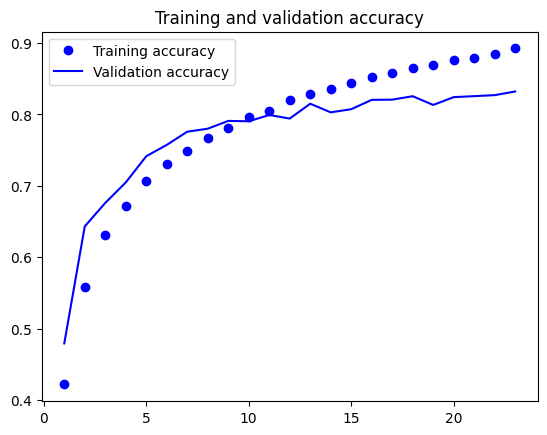

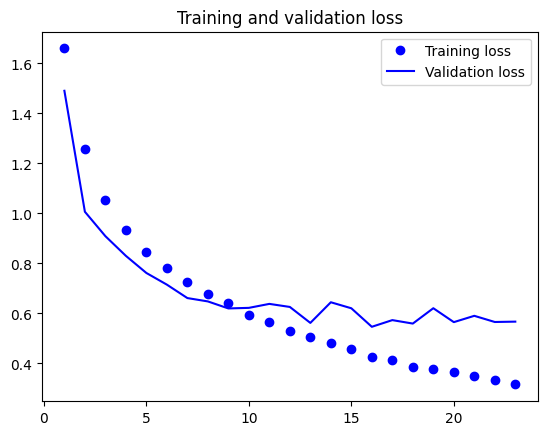

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# the accuracy on validation data did not drop, so there is no significant overtraining
# the Early stopping callback correctly stopped training when the validation loss curve started to flatten